### Background:
- Energy Utility Procurement
- A household customer portfolio 
- Expected sales to household customers in Year 2025
- Total amount 534 GWh
- Start of portfolio management is 1st Jan 2024
- End of portfolio management is 31st December 2024

### Procurement Strategy:
1. Four identical slices for each quarter;
2. The purchase trigger is a dynamic stop loss related to the base product with a spread of your choice
3. The price was generated by stochastic process

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plot import *
from dynamic_stop_loss import *
from cost_benchmark import cost_benchmark
from price_path_simulation import price_path_simulation
import calendar

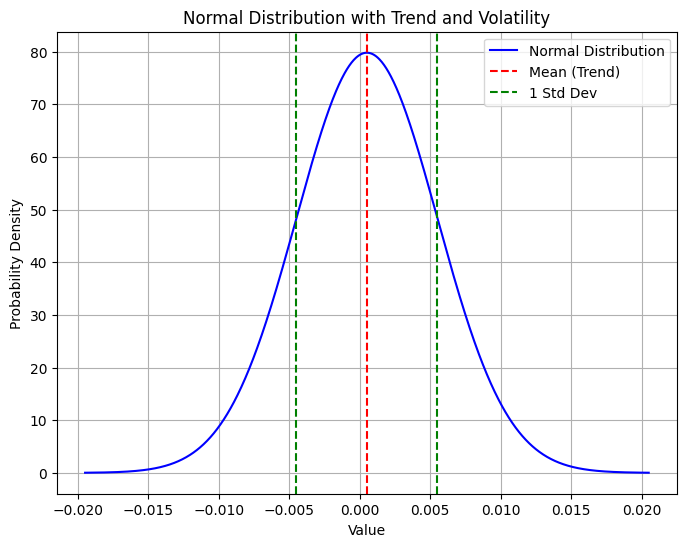

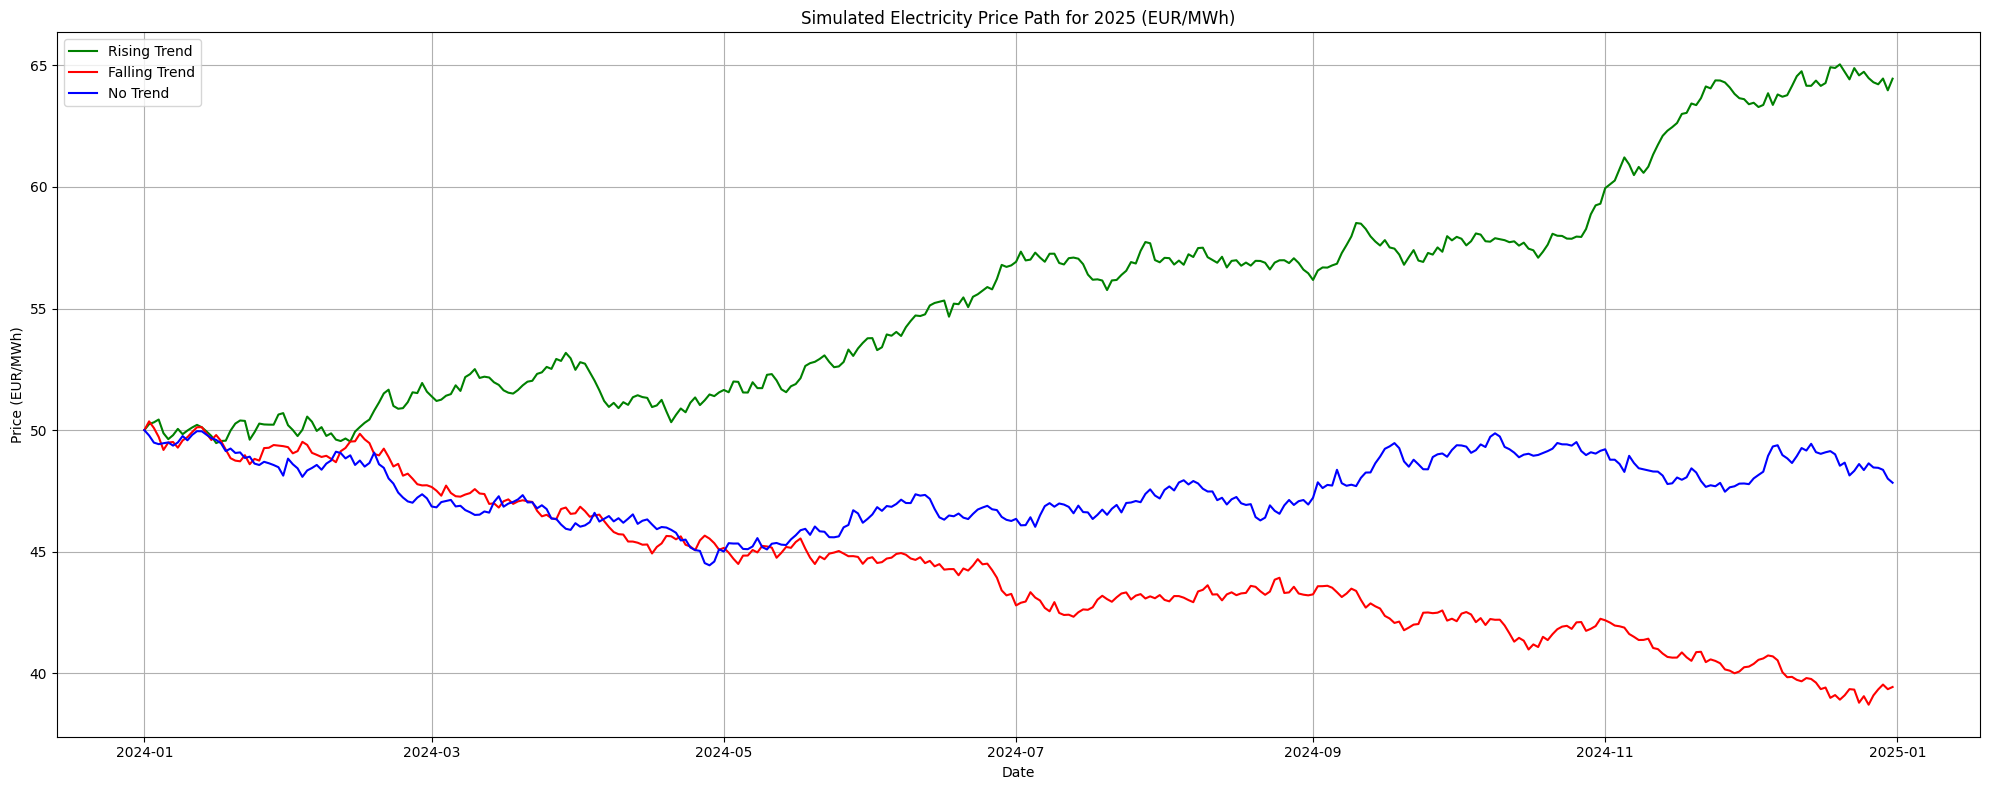

In [4]:
# Set the parameters for price path simulation
np.random.seed(20)
year = 2024
days = 366 if calendar.isleap(year) else 365
initial_price = 50  # Starting price in EUR/MWh (based on historical data)
volatility = 0.005  # daily volatility in EUR/MWh
trend_rising = 0.0005  # upward drift
trend_falling = -0.0005  # downward drift
no_trend = 0  # no drift

# Simulate three different trends: rising, falling and no trend
rising_prices = price_path_simulation(trend_rising, initial_price, volatility, days)
falling_prices = price_path_simulation(trend_falling, initial_price, volatility, days)
no_trend_prices = price_path_simulation(no_trend, initial_price, volatility, days)

# Create a DataFrame to store the results
dates = pd.date_range(start='2024-01-01', periods=days)
df = pd.DataFrame({
    'Date': dates,
    'Rising': rising_prices,
    'Falling': falling_prices,
    'No_Trend': no_trend_prices
})

plot_normal_distribution(trend_rising, volatility)

# Plot the three price path with different trends
plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['Rising'], label='Rising Trend', color='green')
plt.plot(df['Date'], df['Falling'], label='Falling Trend', color='red')
plt.plot(df['Date'], df['No_Trend'], label='No Trend', color='blue')
plt.title('Simulated Electricity Price Path for 2025 (EUR/MWh)')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Define the dataframes for three trends

In [5]:
df_rising = pd.DataFrame({"Dates":dates,'Price': rising_prices})
df_falling = pd.DataFrame({"Dates":dates, 'Price': falling_prices})
df_no_trend = pd.DataFrame({"Dates":dates, 'Price': no_trend_prices})

Calculate the average price for each

In [6]:
rising_average_price = np.round(df_rising['Price'].mean(), 2)
falling_average_price = np.round(df_falling['Price'].mean(), 2)
no_trend_average_price = np.round(df_no_trend['Price'].mean(), 2)

In [7]:
rising_average_price, falling_average_price, no_trend_average_price

(55.61, 44.3, 47.58)

## Procurement on different trends

In [8]:
# choose a spread
spread = 0.8

Quarterly procurement on the rising trend

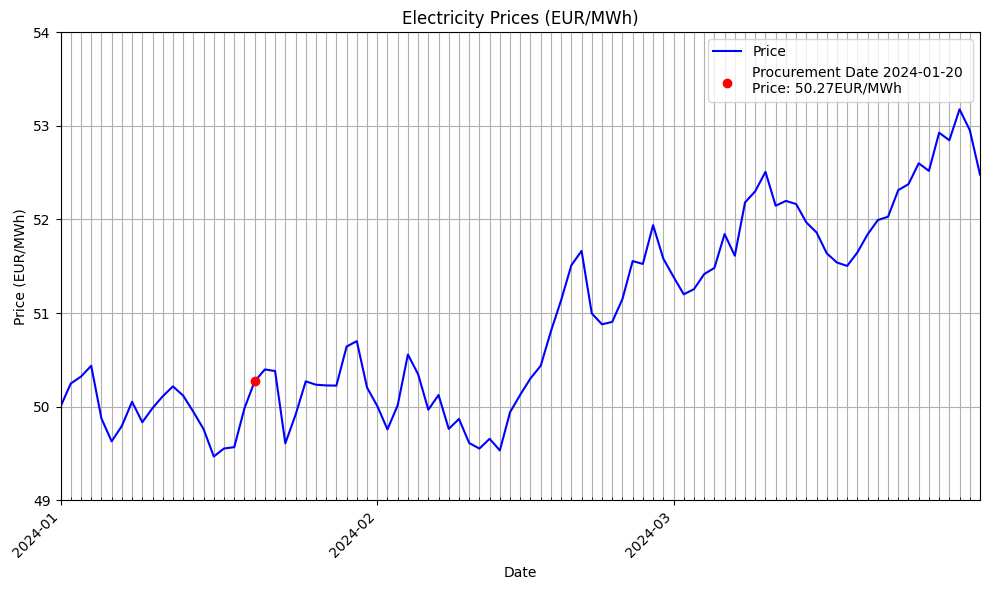

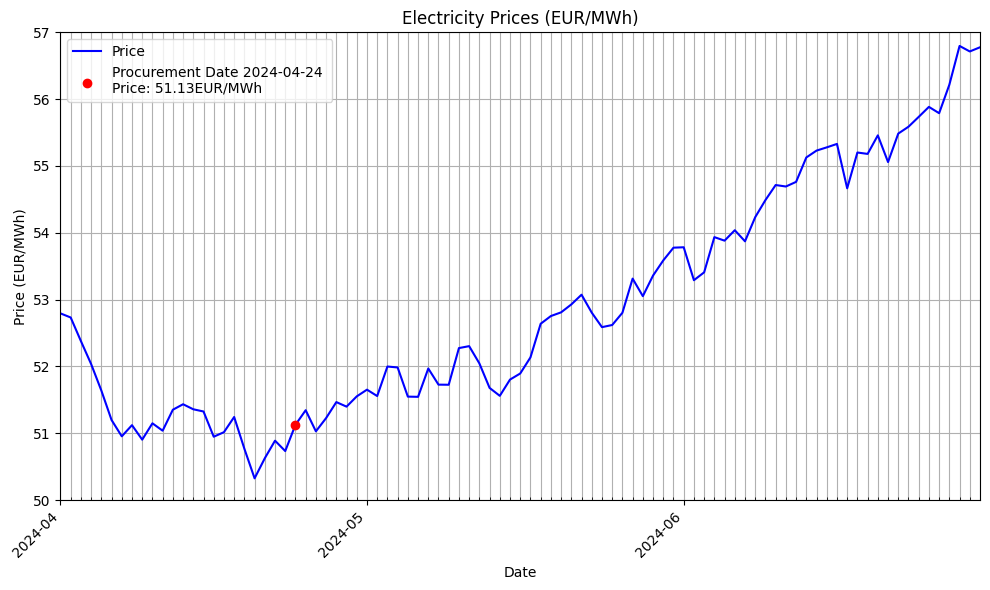

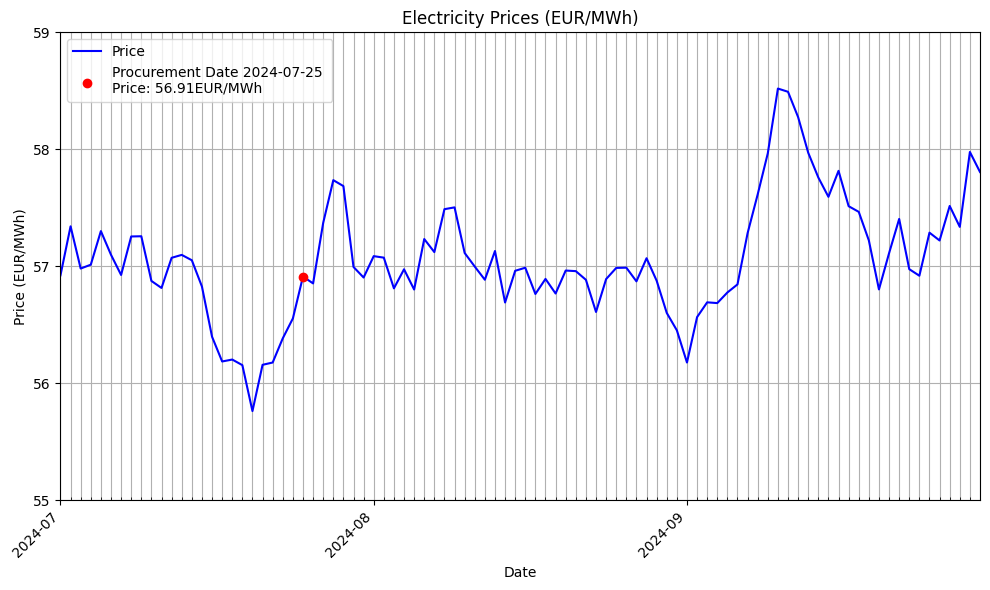

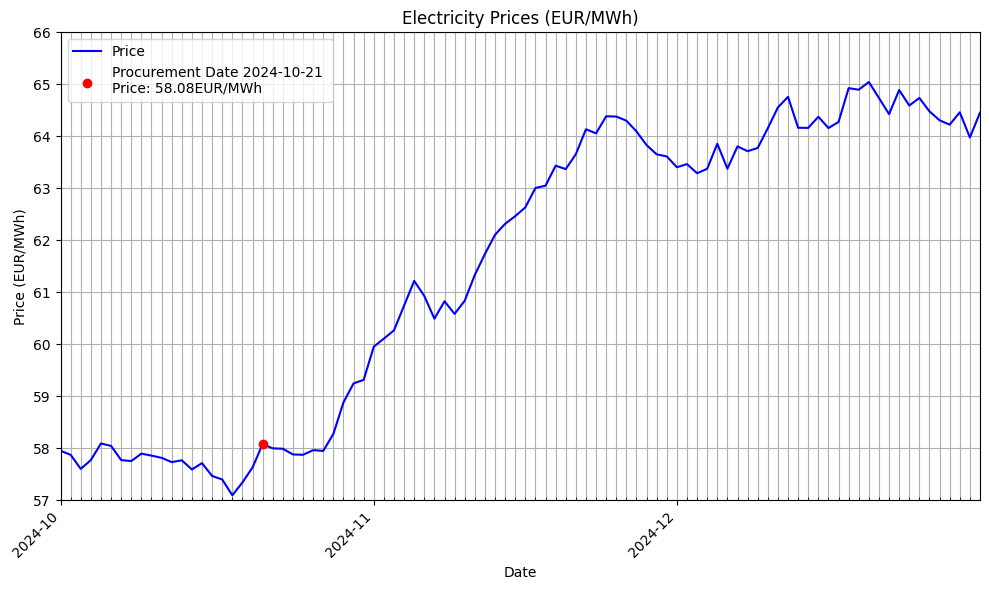

Q1: Procurement Date - 2024-01-20, Procurement Price - 50.27
Q2: Procurement Date - 2024-04-24, Procurement Price - 51.13
Q3: Procurement Date - 2024-07-25, Procurement Price - 56.91
Q4: Procurement Date - 2024-10-21, Procurement Price - 58.08


In [9]:
rising_procurement = quarterly_procurement(df_rising, spread)

## Quarterly procurement on falling trend

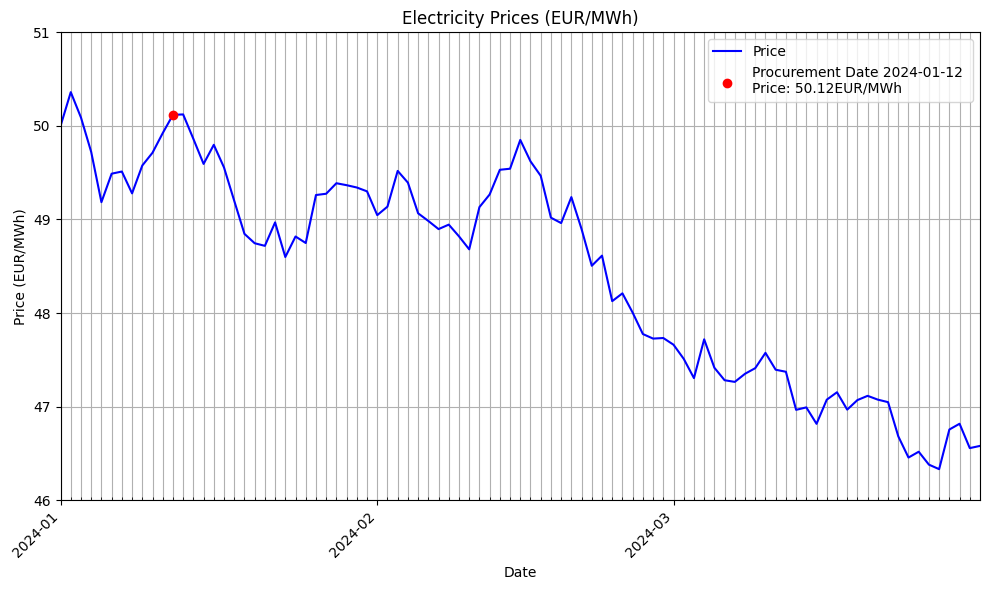

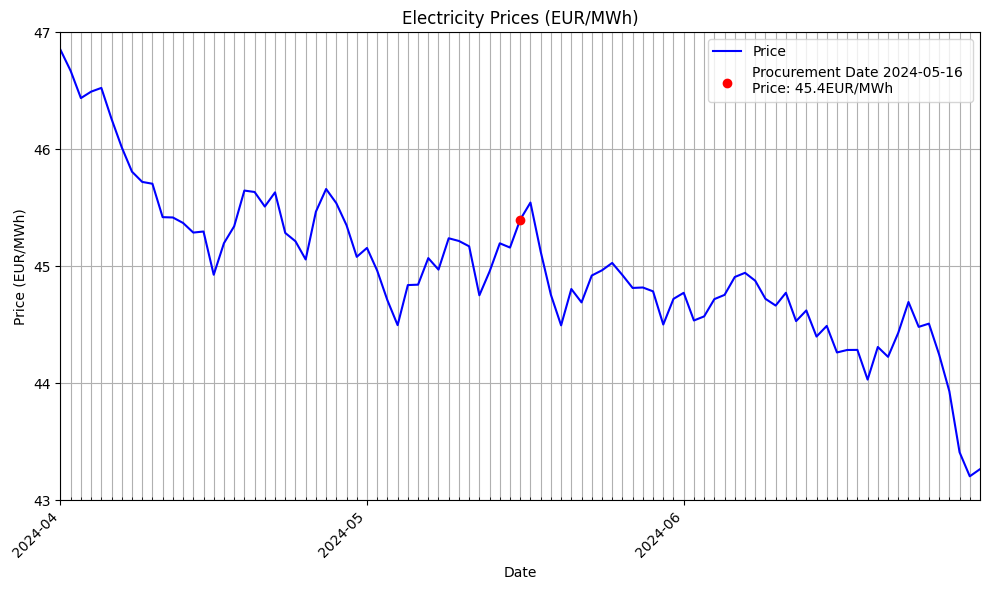

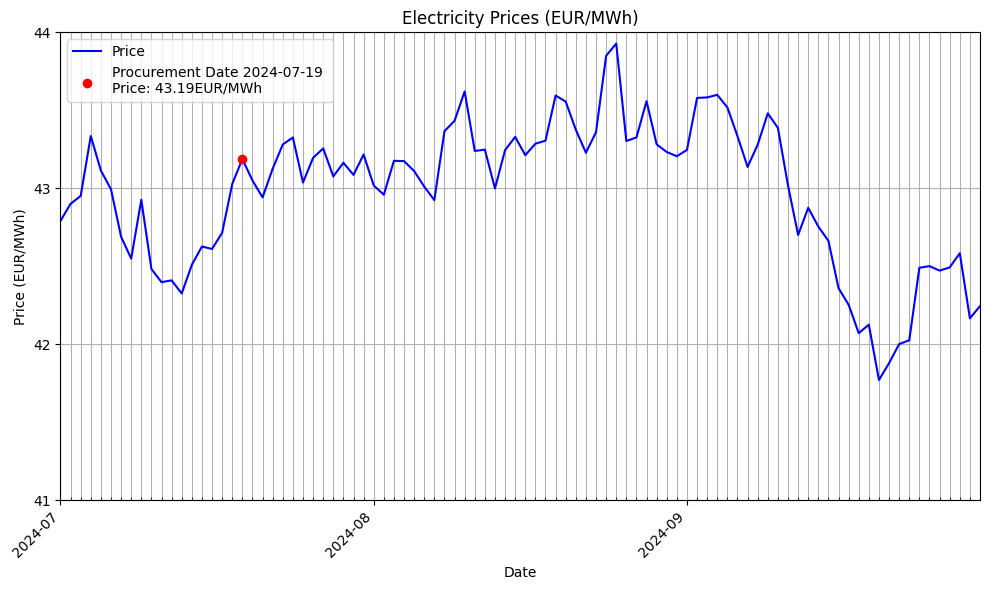

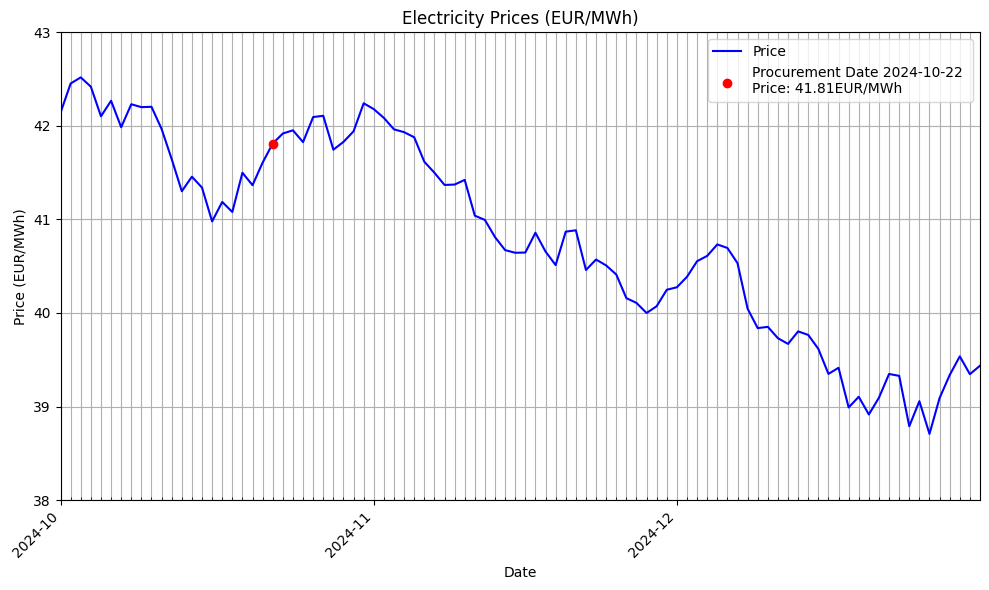

Q1: Procurement Date - 2024-01-12, Procurement Price - 50.12
Q2: Procurement Date - 2024-05-16, Procurement Price - 45.4
Q3: Procurement Date - 2024-07-19, Procurement Price - 43.19
Q4: Procurement Date - 2024-10-22, Procurement Price - 41.81


In [10]:
falling_procurement = quarterly_procurement(df_falling, spread)

## Quarterly procurement on no trend

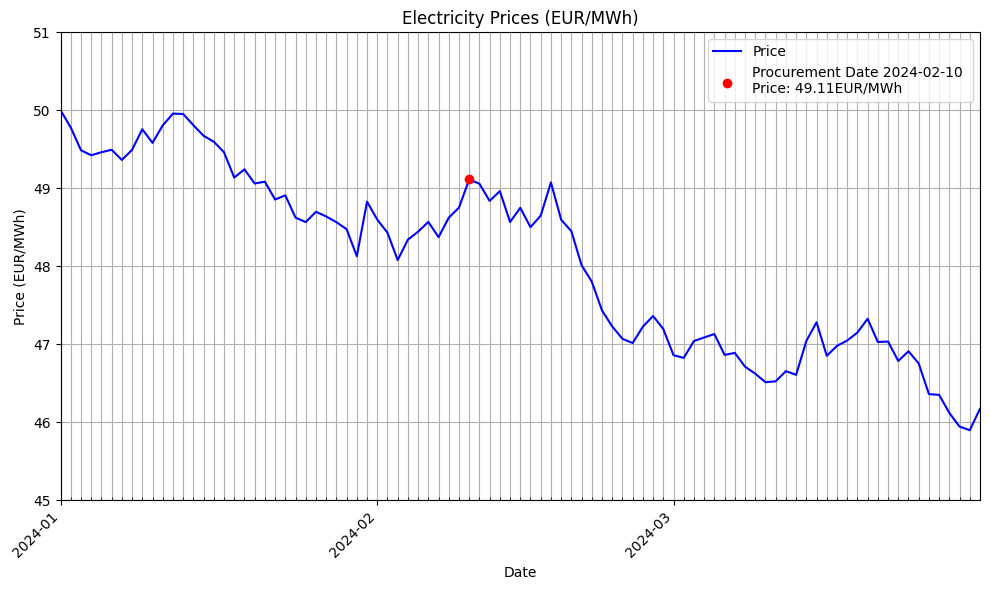

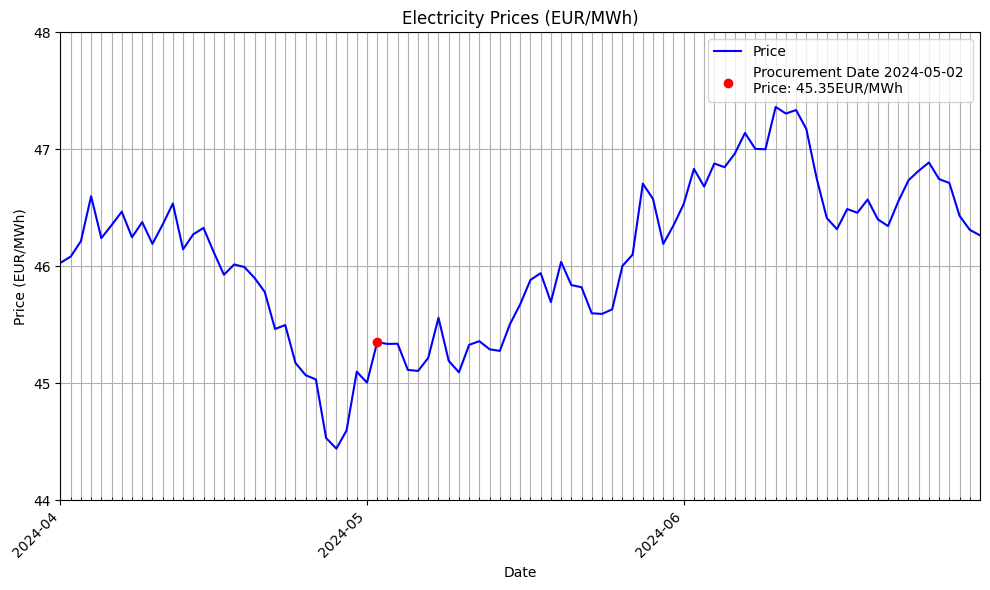

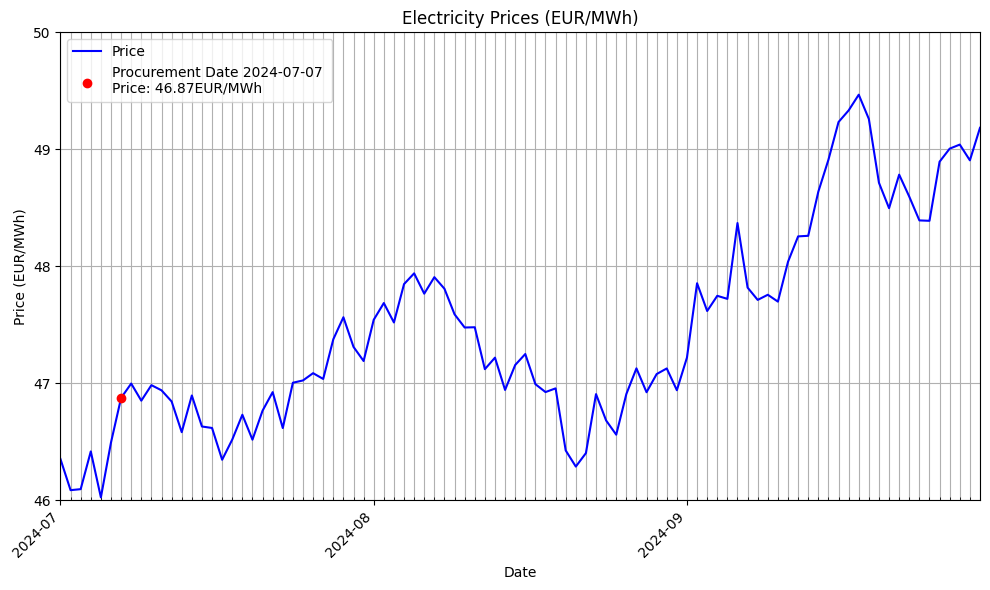

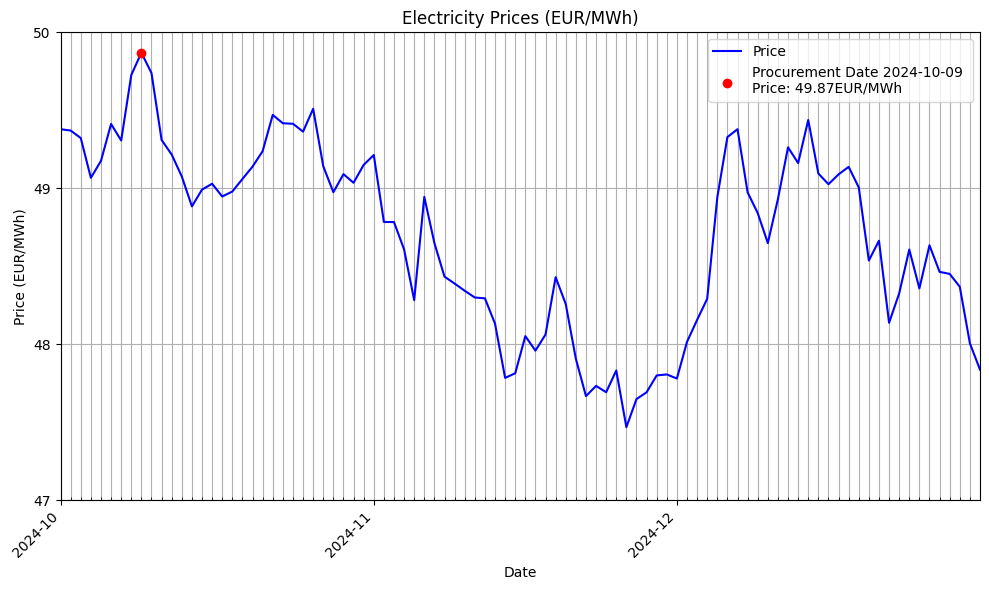

Q1: Procurement Date - 2024-02-10, Procurement Price - 49.11
Q2: Procurement Date - 2024-05-02, Procurement Price - 45.35
Q3: Procurement Date - 2024-07-07, Procurement Price - 46.87
Q4: Procurement Date - 2024-10-09, Procurement Price - 49.87


In [15]:
no_trend_procurement = quarterly_procurement(df_no_trend, spread)

In [13]:
cost_benchmark("Rising Trend", df_rising, rising_procurement)

(55.61, 54.0975, 29695740.0, 28888065.0, 807675.0)

In [14]:
cost_benchmark("Falling Trend", df_falling, falling_procurement)

(44.3, 45.13, 23656200.0, 24099420.0, -443220.0)

In [16]:
cost_benchmark("No Trend", df_no_trend, no_trend_procurement)

(47.58, 47.8, 25407720.0, 25525200.0, -117480.0)